<a href="https://colab.research.google.com/github/michaelJwilson/desihigh/blob/lyaforest/Lymanalphaforest_explorers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you use this notebook in Colab uncomment copy the following lines to a code cell.
```
import os

from google.colab import drive

!git clone https://github.com/michaelJwilson/desihigh

drive.mount('/content/drive')

os.chdir('/content/desihigh/')
```

In [3]:
import glob
from IPython.display import YouTubeVideo
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
#Continuum fitting
import scipy.optimize as op
from tools.legacy import cutout


# Forest Explorers

If you have been at a secuoyas, or coniferous, forest, or at least have seen pictures like this

<img src="https://github.com/michaelJwilson/desihigh/blob/lyaforest/desihigh/images/TropicalForest.jpg?raw=1" alt="Drawing" style="width: 800px;"/>

you have noticed they grow very close to each other and covers densily the space. They are really tall, and some thicker than others. Fascinating!

But in this notebook we'll explore other of kind forests: the Lyman-$\alpha$. 

In 1970 the astronomer Roger Lynds noticed a large number of absorption lines in the spectrum of a very distant quasar, in particular in the region between the Lyman-$\alpha$ (Ly$\alpha$), at $121.6 {\rm nm} $, and the Lyman-$\beta$(Ly$\beta$), at $102.6 {\rm nm}$. The first two lines of Lyman's series, remember we talked about this in the DESI_es notebook? 

Some absorption lines were wider than others, and densely covering the region. It occurred to Lynds that the set of absorptions looked like a forest and thus named it. But what did he discover?

Quasars (sometimes abreviated as QSOs) are galaxies hosting a supermassive black hole, which causes the surrounding gas to emit a large amount of radiation as a result of the accretion process towards the black hole.

Given their great luminosity, it is possible to observe them at really large distances. Although, in pictures they look like points, and sometimes we confuse them with stars.


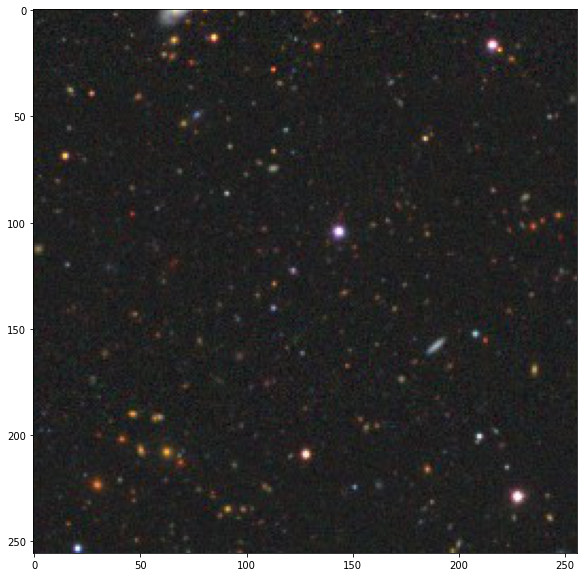

In [4]:
fig, axes  = plt.subplots(1, 1, figsize=(15., 10))
url = cutout(axes,201.75, 7.15 ,scale=0.5)

But the spectra of distant quasars are very disticntive. They have an strong emission Ly$\alpha$ line, and the most distant ones have much more absorptions that the closest ones. 

Some of such absorptions correspond to the same wavelength than the Ly$\alpha$ transition, but we observe it at a lower wavelenght, therfore at a lower redshift than the quasar. This means that light from the quasar as being redshifted it was also being absorbed in regions of hydrogen found along its trayectory towards the observer, or what we usually call the line of sight, as can be seen in this video. 

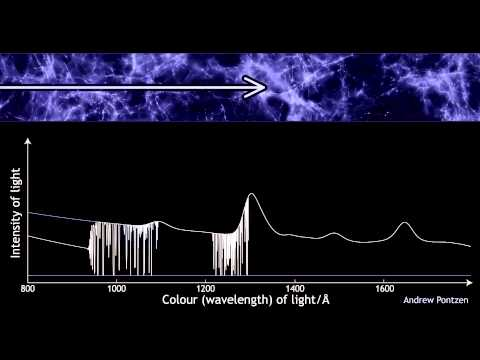

In [5]:
YouTubeVideo('6Bn7Ka0Tjjw')

¡Cool eh!

¿Have you heard about the $\pi$-day (3/14)? Well, we also have the Ly$\alpha$-day (12/16), someone on twitter celebrated it last year with this image...

![lemonalpha](https://pbs.twimg.com/media/EpYAU-2XYAE8SEQ?format=jpg&name=900x900 "lemon")

Lets get serious!

The absorptions detected in the spectra of distant quasars can be used as another tracer (besides the quasars and other galaxies) of the matter distribution in the Universe. The more hydrogen clouds there is the more absorptions we'll observe. As well, there is more hydrogen where there is more dark matter! So, detecting the Ly$\alpha$ absorptions allow us to infer how is the matter distributed in the Universe, and how it changes with time. 

DESI will observe more that 700,000 of distant quasars with which we will be able to identify the Ly$\alpha$ forest for each of them and use them to measure with very high accuracy how fast the Universe has been expanding, and how the dark matter is distributed. 

Lets begin the exploration of DESI's forests!

We'll start by ploting the spectra we have at hand, from the DESI.ipynb notebook

In [6]:
#In the  https://github.com/michaelJwilson/desihigh/DESI_es.ipynb notebook we learned how to access the data for quasars.
qso_tile= 68002
redshifts   = Table()
spectra     = Table()

#Read the spectra ("coadd-") and redshift ("zbest-") files
redshifts      = Table.read('desihigh/student_andes/zbest-qso-68002-20200315.fits')
spectra     = Table.read('desihigh/student_andes/coadd-qso-68002-20200315.fits')

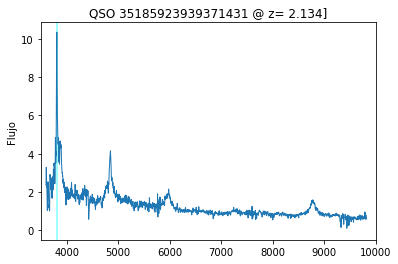

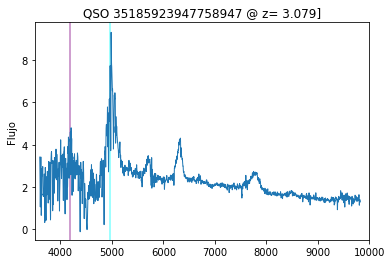

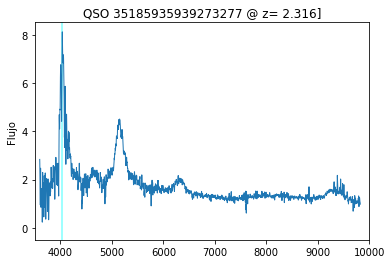

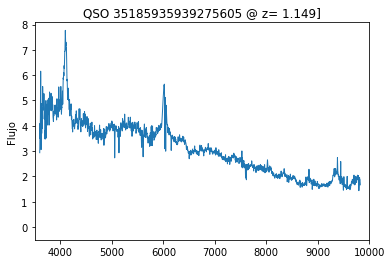

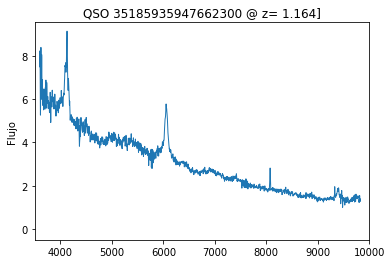

<Figure size 432x288 with 0 Axes>

In [7]:
#Define the Lyman alpha and Lyman beta rest wavelengths in Ansgtrom units.
Lya=1215.67
Lyb=1026.0

#Lets plot the spectra of all QSOs. We add vertical lines to show the Lyman alpha and Lyman beta emission lines, at the given redshift.
for i, tid in enumerate(redshifts['TARGETID']):
    redshift = redshifts['Z'][i]
    plt.axvline((1. + redshift) * Lya, c='cyan', alpha=0.5)
    plt.axvline((1. + redshift) * Lyb, c='purple', alpha=0.5)
    plt.plot(spectra['WAVELENGTH'], spectra['TARGET{:d}'.format(tid)], lw=1)
    plt.title('QSO {} @ z= {:.3f}]'.format(tid, redshift))
    plt.xlim(3.5e3,1.e4)
    plt.ylim(bottom=-0.5)
    plt.ylabel('Flujo')
    plt.show()
    plt.clf()


It seems the Ly$\alpha$ emission line is only visible for the first three quasars. For the first and third quasars there seems to be a few aborptions present, but the Ly$\beta$ emission line is only visible for the second one. The three quasars are at redshift above 2.1, so that's the condition to observe the forest in DESI's quasars!

Lets look in more detail by selecting only quasars with z>2.1, and plot them again, but now highligting the region between the region between Ly$\alpha$ and Ly$\beta.

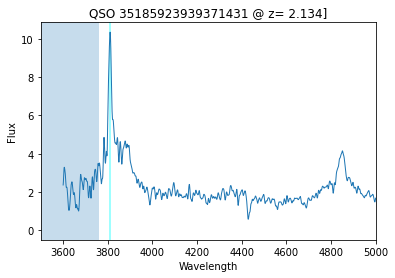

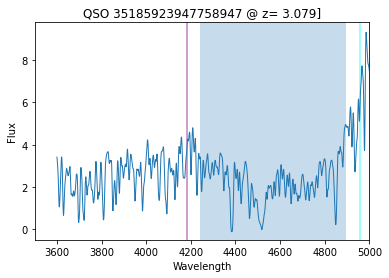

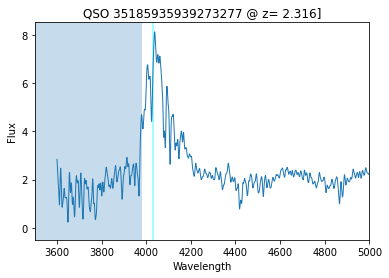

<Figure size 432x288 with 0 Axes>

In [8]:
# Lya forest wavelength range
lambda_min=1040
lambda_max=1200

#Select only QSOs with z>2.1 
islya=redshifts['Z']>2.1
lya_redshifts=redshifts[islya]

for i, tid in enumerate(lya_redshifts['TARGETID']):
    redshift = redshifts['Z'][i]

    # Add a vertical line to show the Lya and Lyb emmision lines 
    plt.axvline((1. + redshift) * Lya, c='cyan', alpha=0.5)
    plt.axvline((1. + redshift) * Lyb, c='purple', alpha=0.5)
    plt.axvspan((1. + redshift) * lambda_min,(1. + redshift) * lambda_max,alpha=0.25)
    plt.plot(spectra['WAVELENGTH'], spectra['TARGET{:d}'.format(tid)], lw=1)
    plt.title('QSO {} @ z= {:.3f}]'.format(tid, redshift))
    plt.xlim(3.5e3, 5.0e3)
    plt.ylim(bottom=-0.5)
    plt.ylabel('Flux')
    plt.xlabel('Wavelength')
    plt.show()
    plt.clf()

Yes! definetely there are some absorptions, the shaded region is the Ly$\alpha$ forest.

You might be wondering, how do we know those are really absorptiond and not noise? 

Well, that is why we need high quality spectra. The longer our telescope capture light from this objects less noise we will have in the spectra, and the real absorptions will become clearer. This gif shows how the noise in our spectra reduces as we add observations of the same object.

![lyaforest](desihigh/images/lya_desihigh.gif "lyaforest")

Do you notice that huge absorption at ~4500 Angstrom? It is quite likely it corresponds to what is called a Damped Lyman alpha absorber (DLA), it is produced by a high density Hydrogen region. We could dedicate a full notebook to this kind of absorptions, but for the porpuse of using the Ly$\alpha$ forest in ciosmology those thick lines are a bit difficult to treat, so we sometimes remove them from the forests. 

As the DLAs, there are other types of absorptions that do not really correspond to the Ly$\alpha$ ones we look for, so we have to spend some time understanding and identifying which absorptions are useful and which not, and try to remove or model them... but, luckely, we don't do that by eye! 

Can you think of a way to identiy DLAs that is quick and easy?

Well, while you design a method to help us out, lets keep it simple and extract the forest regardless the contaminants in there. For this we need to select out only the spectra that is in between the  Ly-$\alpha$ and Ly-$\beta$ region.

In [9]:
for i, tid in enumerate(lya_redshifts['TARGETID']):
    redshift = redshifts['Z'][i]
    tmp=spectra['TARGET{:d}'.format(tid)].copy()
    wave_cut=(spectra['WAVELENGTH']>(1. + redshift) * lambda_min) & (spectra['WAVELENGTH']<(1. + redshift) * lambda_max)
    tmp[~wave_cut]=np.nan
    spectra['FOREST{:d}'.format(tid)]=tmp


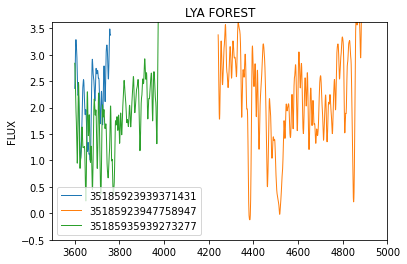

In [10]:
for i, tid in enumerate(lya_redshifts['TARGETID']):
    redshift = redshifts['Z'][i]
    plt.plot(spectra['WAVELENGTH'], spectra['FOREST{:d}'.format(tid)], lw=1, label=tid)
    plt.title("LYA FOREST")
    xmin,xmax=min(spectra[spectra['FOREST{:d}'.format(tid)]!=0]["WAVELENGTH"]),min(spectra[spectra['FOREST{:d}'.format(tid)]!=0]["WAVELENGTH"])
    
    plt.ylim(bottom=-0.5)
    plt.ylabel('FLUX')
    
plt.xlim(3500,5000)
plt.legend()

DONE!

We have found the forests! What's next?

We can see there are regions of the spectra were the spectra looks more or less absorbed than an average, this is becuase there was more or less Hydrogen (i.e more or less matter) than average. We have some overflux/underflux with respect to a mean flux, and this is what we will call the flux transmission field, a.k.a as the "Deltas", which can be computed for each quasar with the following equation:

$\delta_q(\lambda)=\frac{f_q(\lambda)}{\bar{F}(\lambda) C_q(\lambda)}$-1,

where $f_q$ is the observed flux for each quasar, and the term $\bar{F}(\lambda)C_q(\lambda)$ is the mean transmited flux. The $C_q(\lambda)$ alone is the unabsorbed quasar contiuum, the spectra flux that we would have observed if there were not Hydrogen absorbing light, which we can not easily determine from the quasar spectra separated from the mean transmission,$\bar{F}(\lambda)$.

But not everything is lost, some clever scientist realized that we can model the mean transmited flux by a straight line! as follows: 

$\bar{F}(\lambda) C_q(\lambda)= \bar{C (\lambda_{RF})} (a_q+b_q\log{\lambda})$

where $\bar{C}(\lambda_{RF})$ is now the mean continumm, the average of all the quasar continua, in the restframe, which we have to determine. Here comes another approximation, lets think for a moment that its value is 1! in this case we are only left to determine the $a_q$ and $b_q$ for each quasar, which we can do by fitting a straight line to the flux in the forest region. 

If we go this route we can have a first approximation of the Deltas!



In [11]:
#Continuum fitting (HIRAM) 
#(TODO: ADD COMMENTS TO CODE AND PROBABLY DO IT FOR ONLY ONE SPECTRA AND LEAVE AS EXERCISE TO DO IT FOR ALL AT ONCE. ALSO MAYBE SIMPLIFY THE CODE)
#WE DON'T HAVE IVAR TO INCLUDE

def chisq(model_params,model,data):
    model_data = model(model_params)
    chi = (data-model_data)**2
    return np.sum(chi[~np.isnan(chi)])

def fit_spectra(model,tid):
    results = op.minimize(chisq,[0,0],args=(model,spectra['FOREST{:d}'.format(tid)]))
    return results.x


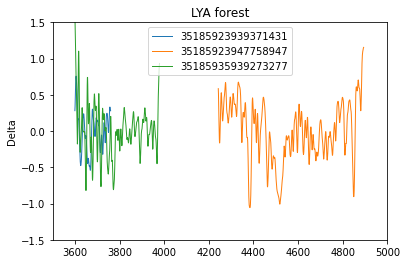

In [12]:
for i, tid in enumerate(lya_redshifts['TARGETID']):
    redshift = redshifts['Z'][i]
    plt.title("LYA forest")
    
    model = lambda model_params: model_params[0]*np.log10(spectra['WAVELENGTH'])+model_params[1]
    m,b = fit_spectra(model,tid)
    model_data = model([m,b])
    nans= np.isnan(spectra['FOREST{:d}'.format(tid)])
    plt.plot(spectra['WAVELENGTH'][~nans], spectra['FOREST{:d}'.format(tid)][~nans]/model_data[~nans]-1, lw=1, label=tid)
    
    plt.ylim(bottom=-1)
    plt.ylabel('Delta')
    
plt.xlim(3500,5000)
plt.ylim(-1.5,1.5)
plt.legend()

How do you think we could get a better estimation of the Deltas? Think about it and try your ideas... 

Once we have the Deltas, and we are happy with the estimation, we are left to use them to calculate how fast the Universe is expanding. But we will leave that for future work...